In [11]:
from tools import *
image_path = "/home/user/documents/PiereLab/lysozyme/DemoData/ClearedForProcessing/G2EL-RFP 40x-4.tif"
raw_image =  tifffile.imread(str(image_path))
debug = True


cleaned = image_prep.inconvenient_object_remover(raw_image.copy()).remove_scale_bar()
red_image = image_prep.select_image_channels.red(cleaned)
red_chr = image_prep.select_image_channels.red_chromaticity(cleaned)
red_chr_enh = image_prep.enhance_contrast.enhance_nonblack(red_chr)
bin_mask = image_prep.masker(red_chr_enh).otsu().morph_cleanup().cleaned_mask

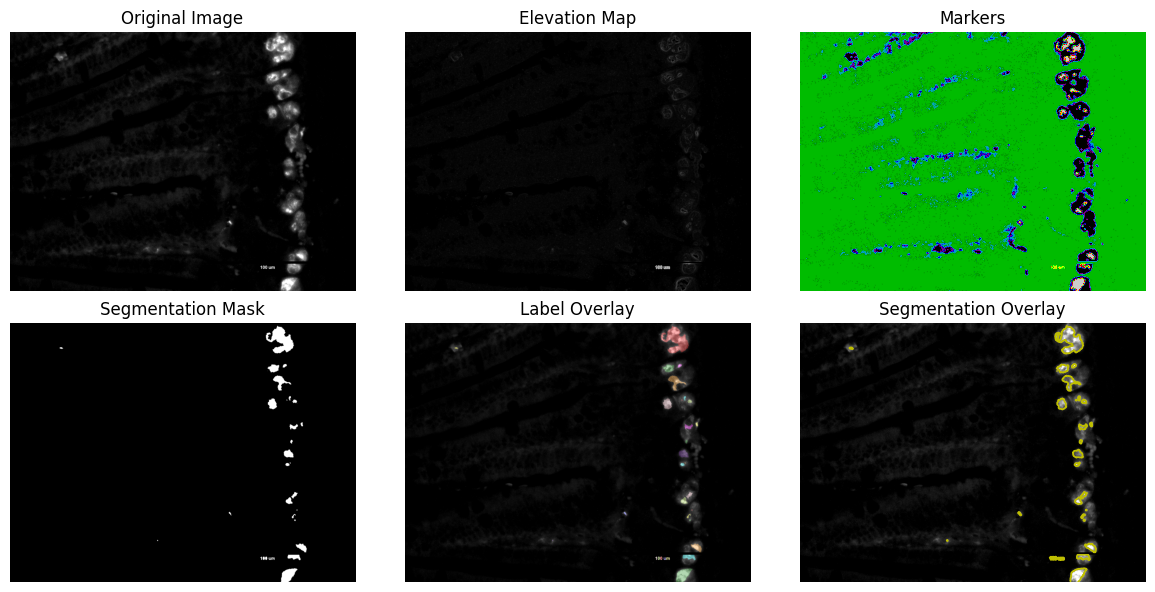

In [12]:
# tight blob segmentation
water = DetectionMethods.region_based_segmentation(image=red_image, low_thresh=30, high_thresh=150)
water.detect_blobs().visualize()

In [ ]:
# competitive flooding
flood = CompetitiveFlooding(water.labeled, bin_mask, red_image, debug=debug).run()
